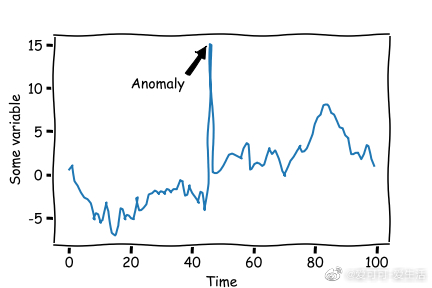

In [1]:
import pandas as pd
import tsod
from tsod import RangeDetector
from tsod import ConstantValueDetector
from tsod import CombinedDetector
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
rd = RangeDetector(max_value=2.0)

In [3]:
data = pd.Series([0.0, 1.0, 3.0])

In [4]:
anom = rd.detect(data)

In [5]:
anom

0    False
1    False
2     True
dtype: bool

In [6]:
data[anom]

2    3.0
dtype: float64

In [7]:
df = pd.read_csv("/home/ningoy/projects/MyJupyterLab/data/MiFit/1050893151_1646928855138/BODY/BODY_1646928854657.csv", parse_dates=True, index_col=0)

In [8]:
my_series = df['weight']

In [9]:
normal_data = my_series.loc['2021-01-01 03:15:37+0000':'2021-05-01 01:15:13+0000']

In [10]:
some_data = my_series.loc['2021-01-01 04:41:23+0000':'2022-12-01 00:36:05+0000']

In [11]:
cd = CombinedDetector([ConstantValueDetector(), RangeDetector()])

In [12]:
cd.fit(normal_data)
cd.save("detector.joblib")
my_detector = tsod.load("detector.joblib")
my_anom = my_detector.detect(some_data)

<AxesSubplot:xlabel='time', ylabel='weight'>

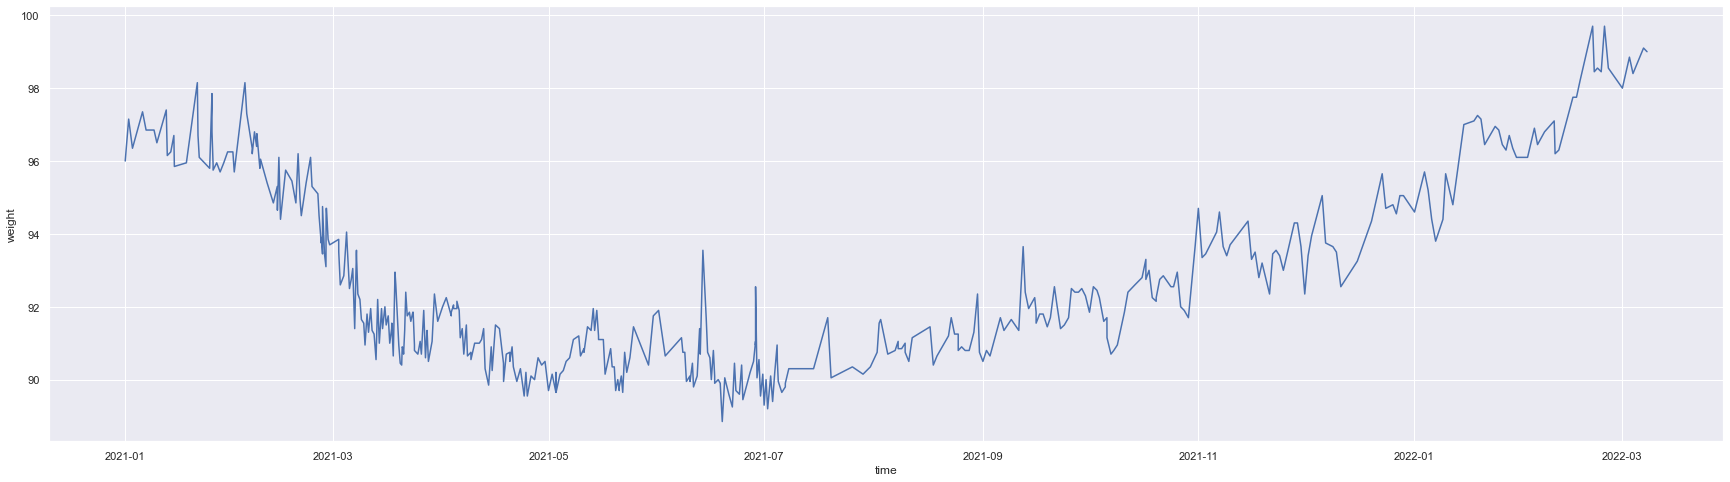

In [13]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.lineplot(x="time", y="weight", data=df.loc['2021-01-01 03:15:37+0000':'2022-03-08 00:36:05+0000'])

In [14]:
my_anom

time
2021-01-02 02:44:03+00:00    False
2021-01-03 04:34:39+00:00    False
2021-01-06 01:01:30+00:00    False
2021-01-07 01:05:05+00:00    False
2021-01-09 07:03:56+00:00    False
                             ...  
2022-03-01 01:09:38+00:00    False
2022-03-03 01:03:42+00:00     True
2022-03-04 01:09:08+00:00     True
2022-03-07 00:50:51+00:00     True
2022-03-08 00:36:05+00:00     True
Length: 447, dtype: bool

In [15]:
df['my_anom'] = my_anom
df['my_anom'] = df['my_anom'].fillna(False)

<AxesSubplot:xlabel='time', ylabel='weight'>

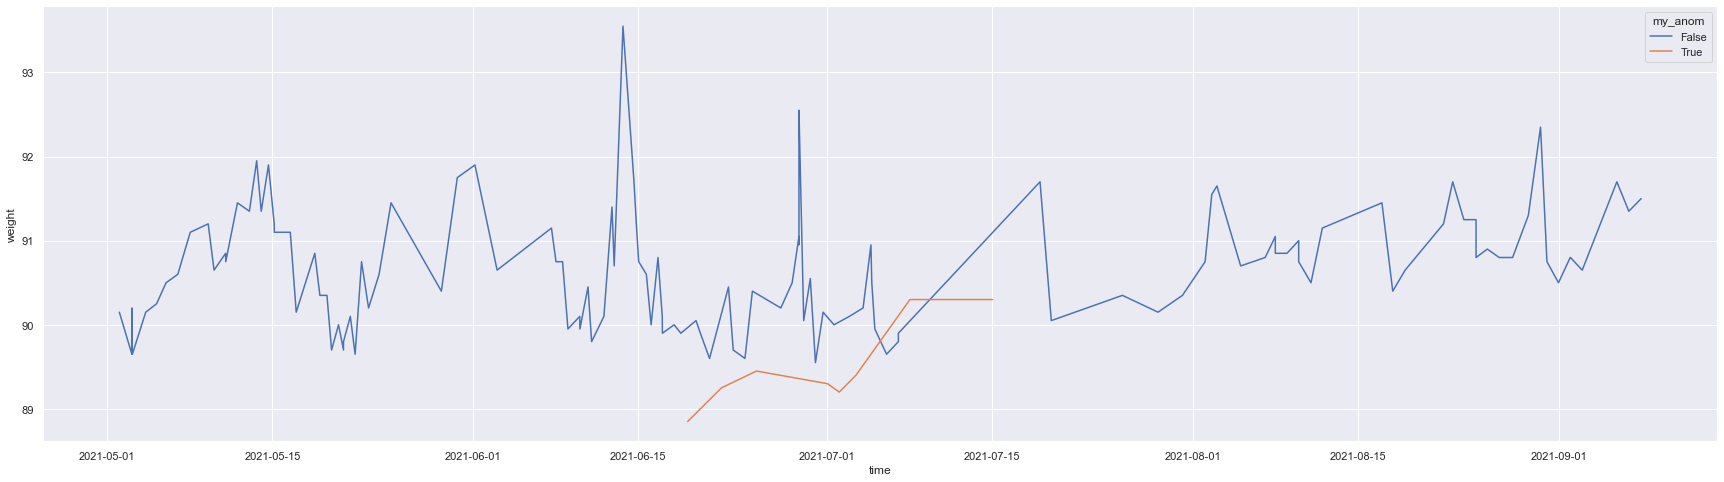

In [16]:
sns.lineplot(x="time", y="weight", data=df.loc['2021-05-01 03:15:37+0000':'2021-09-08 00:36:05+0000'], hue="my_anom")

<AxesSubplot:xlabel='time', ylabel='weight'>

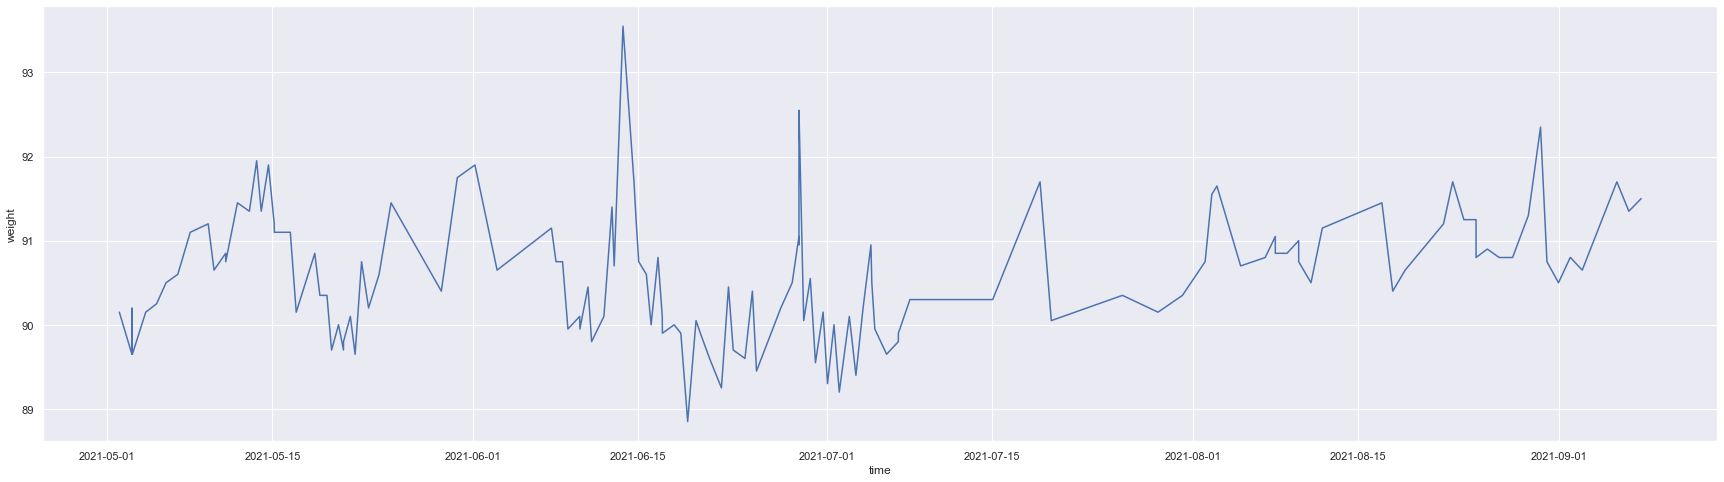

In [17]:
sns.lineplot(x="time", y="weight", data=df.loc['2021-05-01 03:15:37+0000':'2021-09-08 00:36:05+0000'])